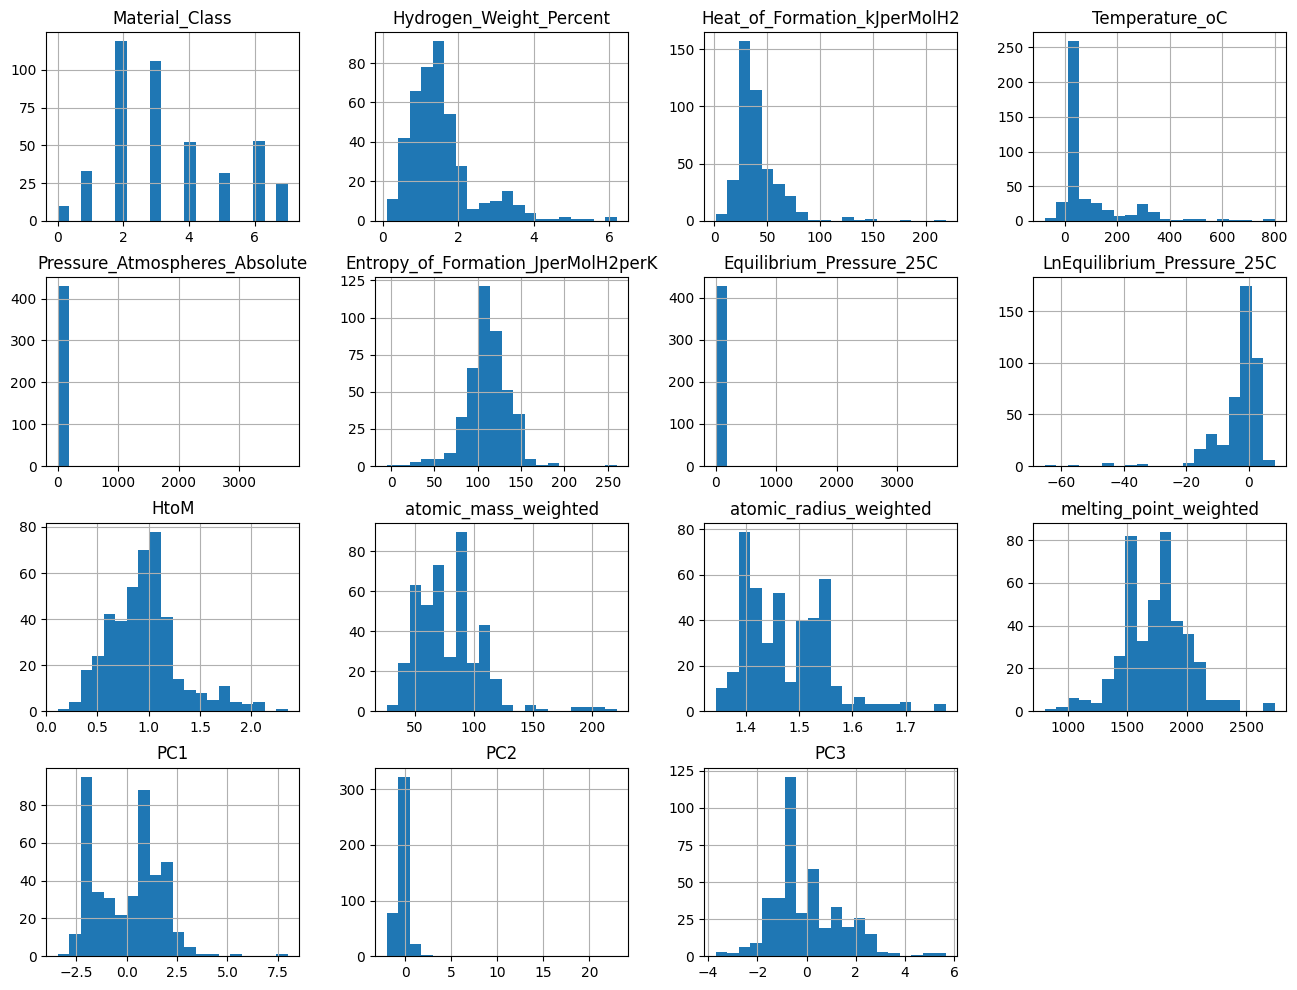

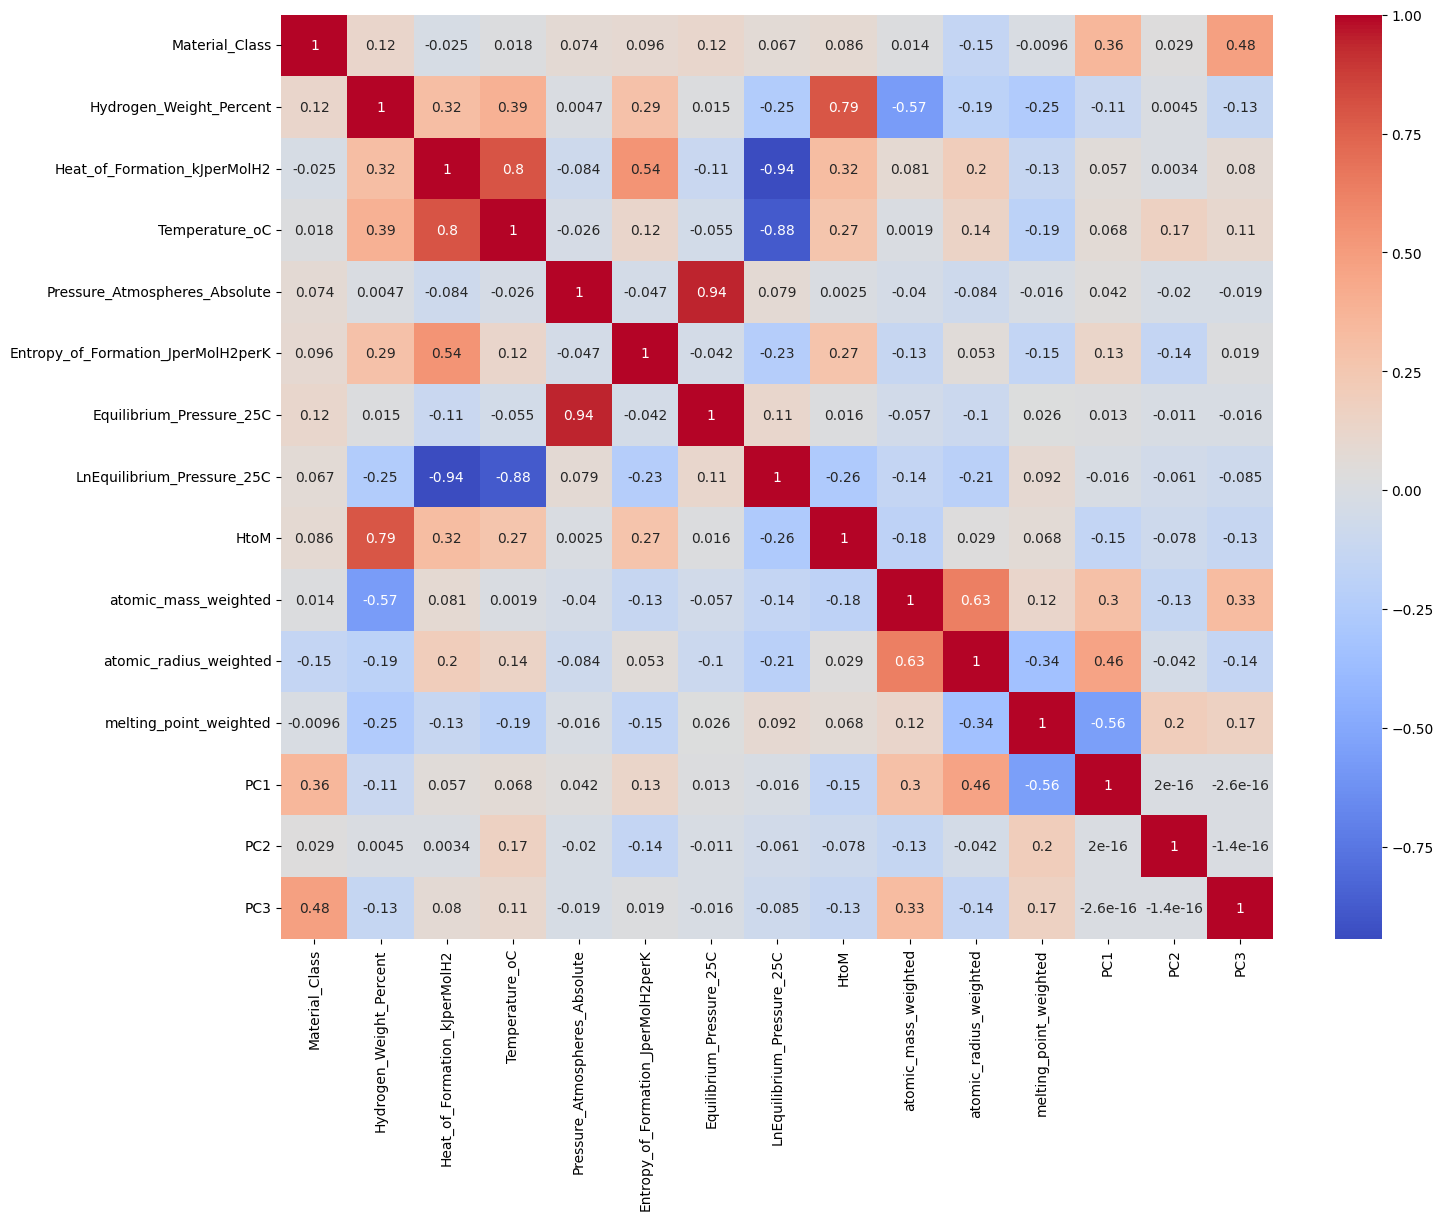

LinearRegression - RMSE: 0.3479876449325023, R2: 0.8954275055477372
DecisionTreeRegressor - RMSE: 0.3549643265549582, R2: 0.8911923986590798
RandomForestRegressor - RMSE: 0.3055024730543013, R2: 0.9194029254525831
SVR - RMSE: 0.3751990475566788, R2: 0.8784336793515286
XGBRegressor - RMSE: 0.3121724803558106, R2: 0.9158451697911022
LinearRegression - RMSE: 0.11300613616783571, R2: 0.9999798193527533
DecisionTreeRegressor - RMSE: 18.104118342460556, R2: 0.4820524314638718
RandomForestRegressor - RMSE: 13.43036955805023, R2: 0.7149592413450256
SVR - RMSE: 0.12136955541429485, R2: 0.9999767217375054
XGBRegressor - RMSE: 11.631857332644147, R2: 0.7861894293514333
RandomForestClassifier - Accuracy: 0.9069767441860465, F1-Score: 0.9116145026883742
RandomForestClassifier - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      0.70      0.82        10
           2       0.86      0.93     

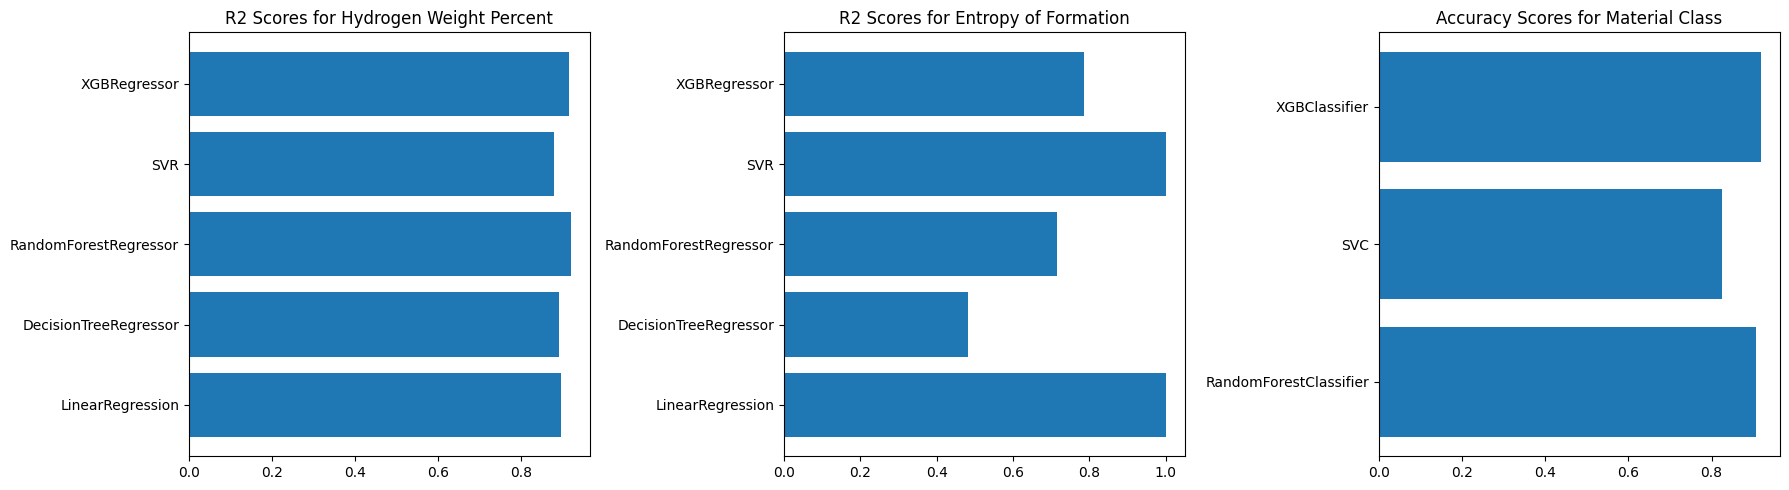

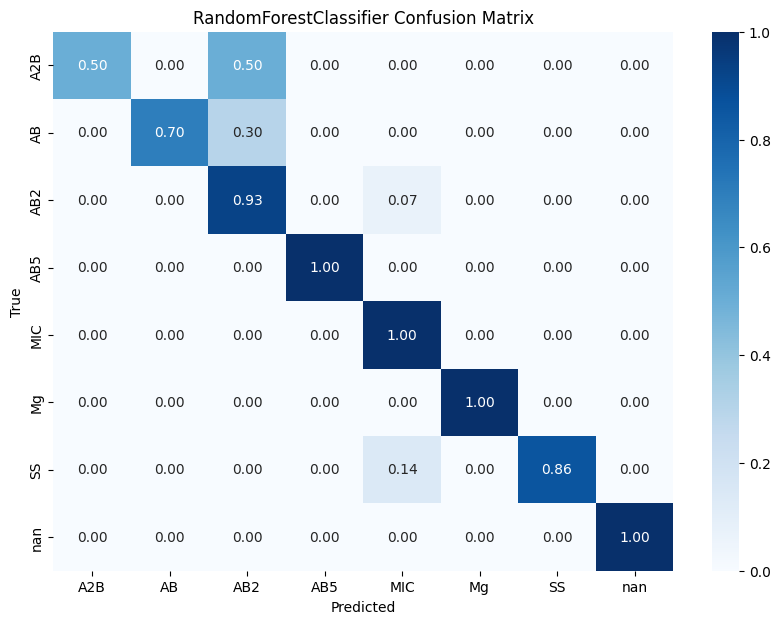

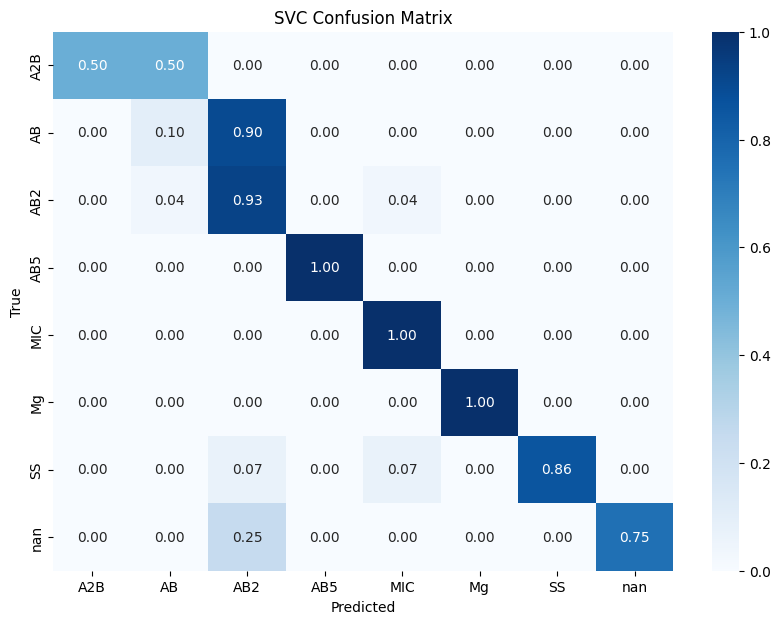

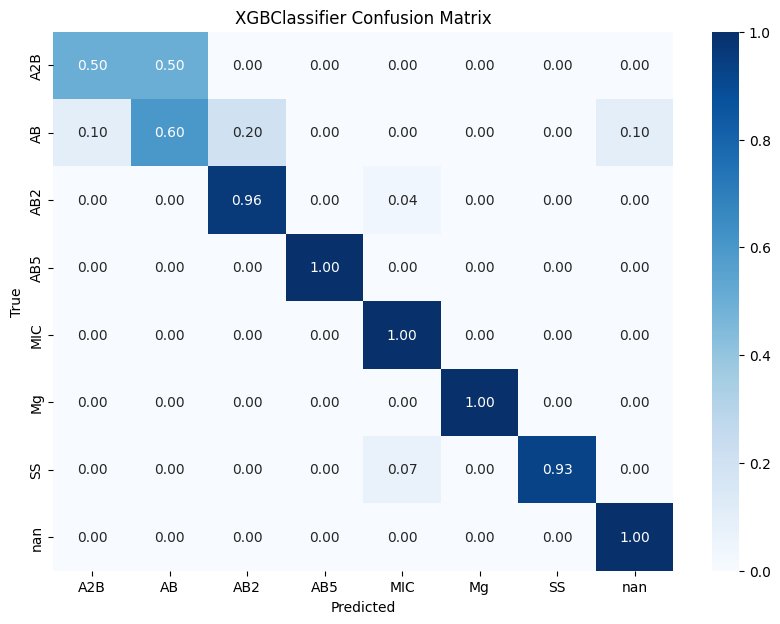

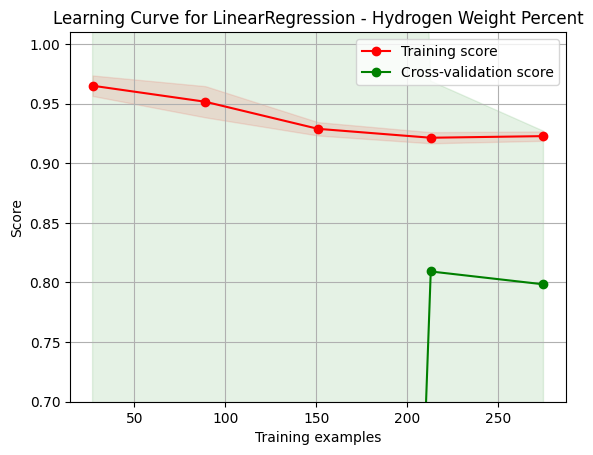

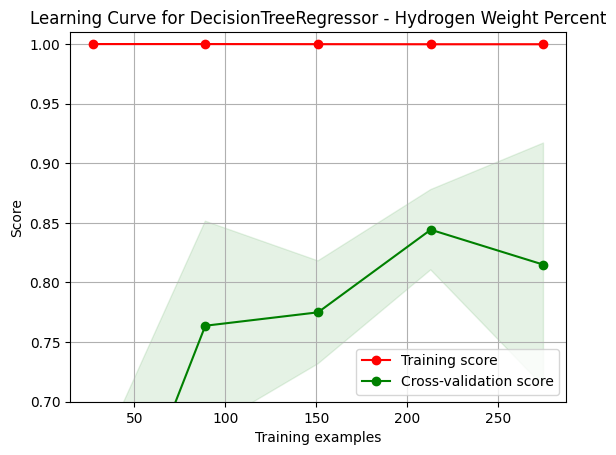

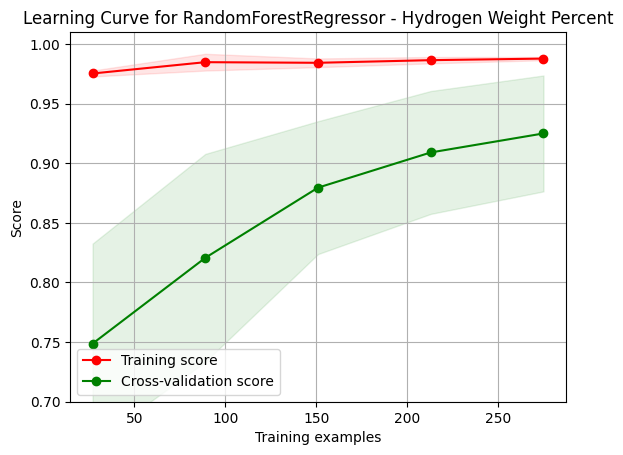

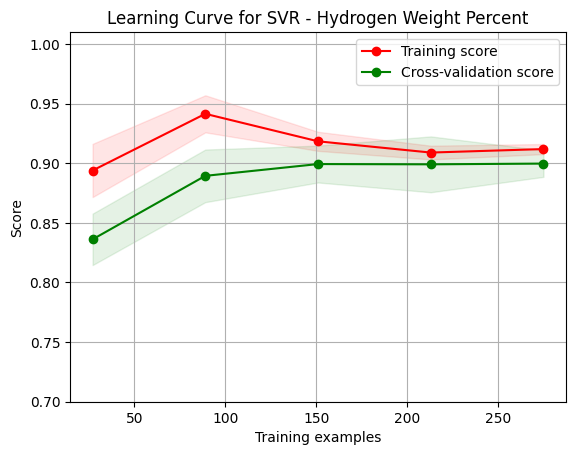

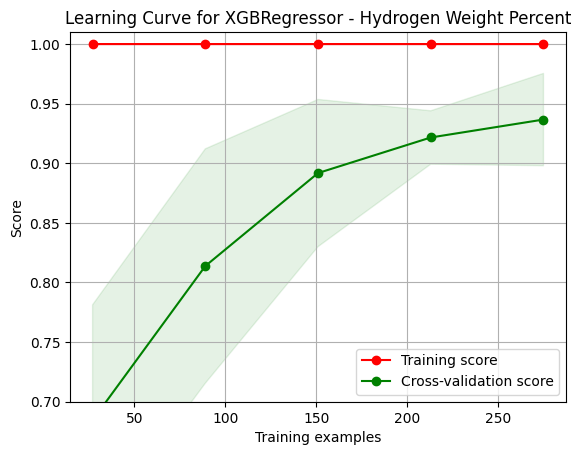

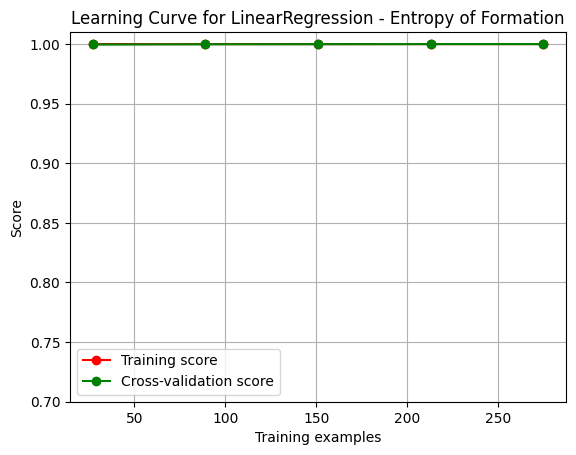

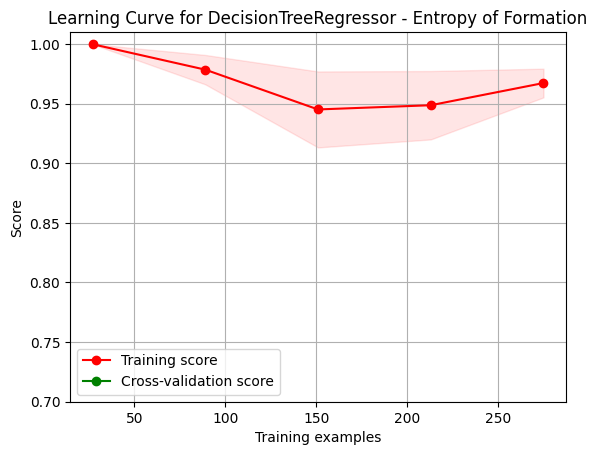

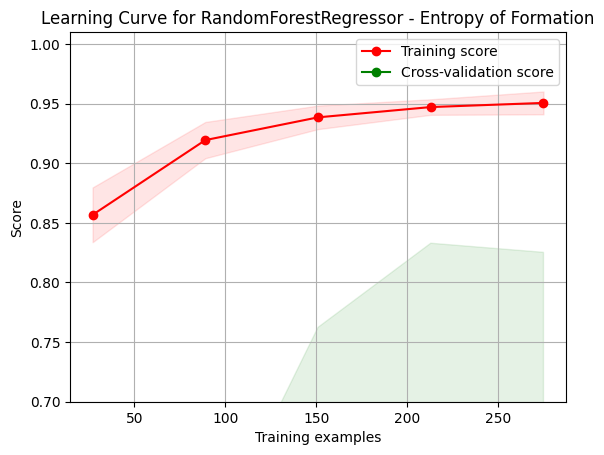

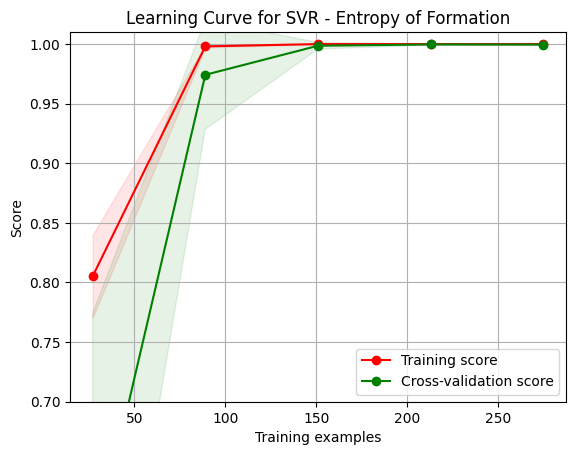

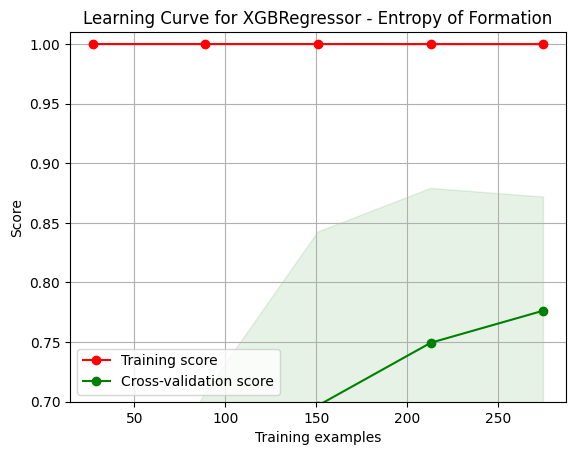

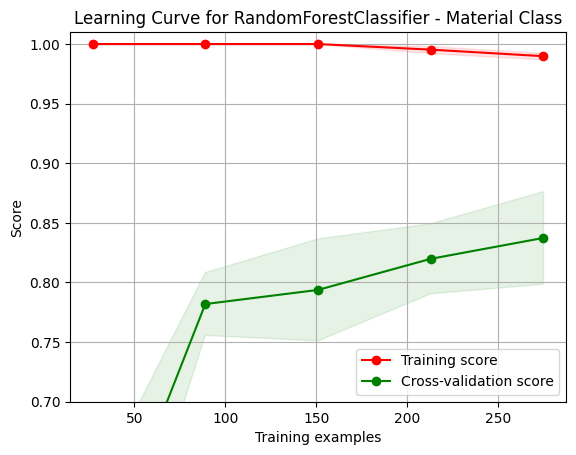

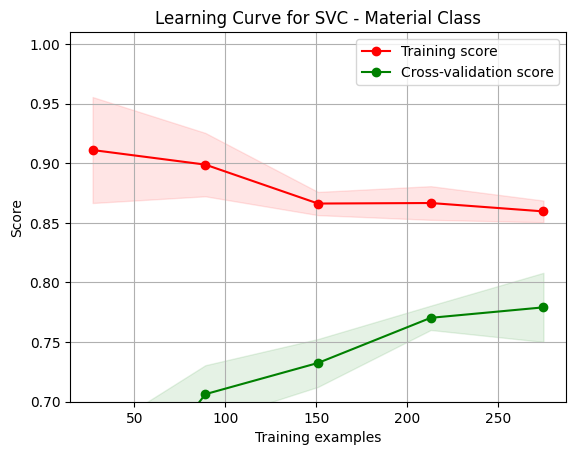

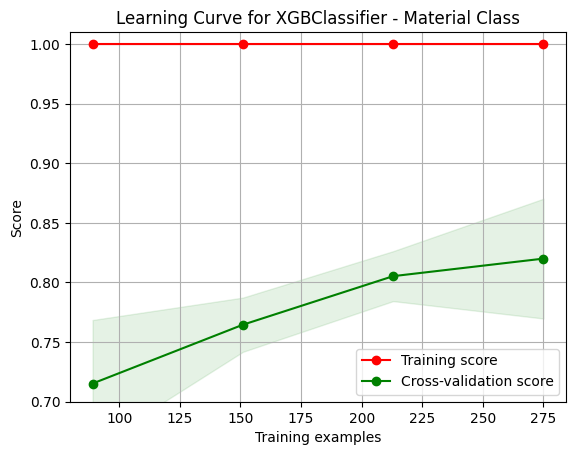

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
import xgboost as xgb

file_path = 'databases/PCA_KNN_imputed_hea.csv'
data = pd.read_csv(file_path)
data['Material_Class'] = data['Material_Class'].astype(str)
le = LabelEncoder()
data['Material_Class'] = le.fit_transform(data['Material_Class'])

# Exploratory Data Analysis (EDA)
num_features = data.select_dtypes(include=[np.number]).columns
data[num_features].hist(figsize=(16, 12), bins=20)
plt.show()

plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# Features and targets for regression
X = data.drop(['Hydrogen_Weight_Percent', 'Entropy_of_Formation_JperMolH2perK', 'Material_Class', 'Composition_Formula'], axis=1)
y_hydrogen = data['Hydrogen_Weight_Percent']
y_entropy = data['Entropy_of_Formation_JperMolH2perK']

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X, y_hydrogen, test_size=0.2, random_state=42)
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X, y_entropy, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_h = scaler.fit_transform(X_train_h)
X_test_h = scaler.transform(X_test_h)
X_train_e = scaler.fit_transform(X_train_e)
X_test_e = scaler.transform(X_test_e)

# Grid search for regression models
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBRegressor': xgb.XGBRegressor()
}

def perform_grid_search(model, params, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, scoring='r2')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

params = {
    'LinearRegression': {},
    'DecisionTreeRegressor': {'max_depth': [3, 5, 7, 10]},
    'RandomForestRegressor': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10]},
    'SVR': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'XGBRegressor': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10]}
}

best_models_h = {}
for name, model in models.items():
    best_model = perform_grid_search(model, params[name], X_train_h, y_train_h)
    best_models_h[name] = best_model
    y_pred = best_model.predict(X_test_h)
    print(f"{name} - RMSE: {np.sqrt(mean_squared_error(y_test_h, y_pred))}, R2: {r2_score(y_test_h, y_pred)}")

best_models_e = {}
for name, model in models.items():
    best_model = perform_grid_search(model, params[name], X_train_e, y_train_e)
    best_models_e[name] = best_model
    y_pred = best_model.predict(X_test_e)
    print(f"{name} - RMSE: {np.sqrt(mean_squared_error(y_test_e, y_pred))}, R2: {r2_score(y_test_e, y_pred)}")

# Features and targets for classification
X = data.drop(['Material_Class', 'Composition_Formula'], axis=1)
y = data['Material_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Grid search for classification models
class_models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'XGBClassifier': xgb.XGBClassifier()
}

class_params = {
    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'XGBClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10]}
}

best_class_models = {}
for name, model in class_models.items():
    best_model = perform_grid_search(model, class_params[name], X_train, y_train)
    best_class_models[name] = best_model
    y_pred = best_model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred)}, F1-Score: {f1_score(y_test, y_pred, average='weighted')}")
    print(f"{name} - Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"{name} - Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# Summarize results
results = []

for name, model in best_models_h.items():
    y_pred = model.predict(X_test_h)
    results.append({'Model': name, 'Target': 'Hydrogen_Weight_Percent', 'RMSE': np.sqrt(mean_squared_error(y_test_h, y_pred)), 'R2': r2_score(y_test_h, y_pred)})

for name, model in best_models_e.items():
    y_pred = model.predict(X_test_e)
    results.append({'Model': name, 'Target': 'Entropy_of_Formation', 'RMSE': np.sqrt(mean_squared_error(y_test_e, y_pred)), 'R2': r2_score(y_test_e, y_pred)})

for name, model in best_class_models.items():
    y_pred = model.predict(X_test)
    results.append({'Model': name, 'Target': 'Material_Class', 'Accuracy': accuracy_score(y_test, y_pred), 'F1-Score': f1_score(y_test, y_pred, average='weighted')})

results_df = pd.DataFrame(results)
print(results_df)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].barh(results_df[results_df['Target'] == 'Hydrogen_Weight_Percent']['Model'], results_df[results_df['Target'] == 'Hydrogen_Weight_Percent']['R2'])
axes[0].set_title('R2 Scores for Hydrogen Weight Percent')

axes[1].barh(results_df[results_df['Target'] == 'Entropy_of_Formation']['Model'], results_df[results_df['Target'] == 'Entropy_of_Formation']['R2'])
axes[1].set_title('R2 Scores for Entropy of Formation')

axes[2].barh(results_df[results_df['Target'] == 'Material_Class']['Model'], results_df[results_df['Target'] == 'Material_Class']['Accuracy'])
axes[2].set_title('Accuracy Scores for Material Class')

plt.tight_layout()
plt.show()

# Confusion matrices for classification models
for name, model in best_class_models.items():
    y_pred = model.predict(X_test)
    plt.figure(figsize=(10, 7))
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Learning curves
def plot_learning_curve(estimator, title, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.ylim((0.7, 1.01))
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Learning curves for the best regression models
for name, model in best_models_h.items():
    plot_learning_curve(model, f'Learning Curve for {name} - Hydrogen Weight Percent', X_train_h, y_train_h)
    plt.show()

for name, model in best_models_e.items():
    plot_learning_curve(model, f'Learning Curve for {name} - Entropy of Formation', X_train_e, y_train_e)
    plt.show()

# Learning curves for the best classification models
for name, model in best_class_models.items():
    plot_learning_curve(model, f'Learning Curve for {name} - Material Class', X_train, y_train)
    plt.show()

